This Jupyter Notebook goes through the stages required in Python to:
- Import share data from the internet
- Calculate parabolic SAR using the Ta-Lib package
- Plot the parabolic SAR with the closing price

In [1]:
# Import required modules
import talib
import pandas as pd
import numpy as np
from datetime import datetime
import mplfinance as mfp
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import share data
start = datetime(1988,7,1)
end = datetime(2022,6,1)
pdr_bae_data = pdr.DataReader("BA.L",'yahoo',start,end)

In [3]:
#Configure the parabolic SAR
acc_factor = 0.02
max_acc_factor = 0.2

pdr_bae_data['SAR'] = talib.SAR(pdr_bae_data['High'].values, pdr_bae_data['Low'].values,
                                acceleration = acc_factor,maximum = max_acc_factor)

pdr_bae_data

,High,Low,Open,Close,Volume,Adj Close,SAR
Date,,,,,,,
1988-07-01,100.918602,100.918602,100.918602,100.918602,0.0,34.474159,NaN
1988-07-04,100.918602,100.918602,100.918602,100.918602,0.0,34.474159,100.918602
1988-07-05,102.384804,102.384804,102.384804,102.384804,0.0,34.975025,100.918602
1988-07-06,100.674301,100.674301,100.674301,100.674301,0.0,34.390697,102.384804
1988-07-07,98.963799,98.963799,98.963799,98.963799,0.0,33.806396,102.384804
...,...,...,...,...,...,...,...
2022-05-26,771.000000,763.000000,763.000000,771.000000,5179317.0,771.000000,725.813737
2022-05-27,777.400024,766.200012,768.000000,766.799988,6744046.0,766.799988,727.885186
2022-05-30,772.400024,758.599976,766.000000,761.599976,8815339.0,761.599976,729.873778


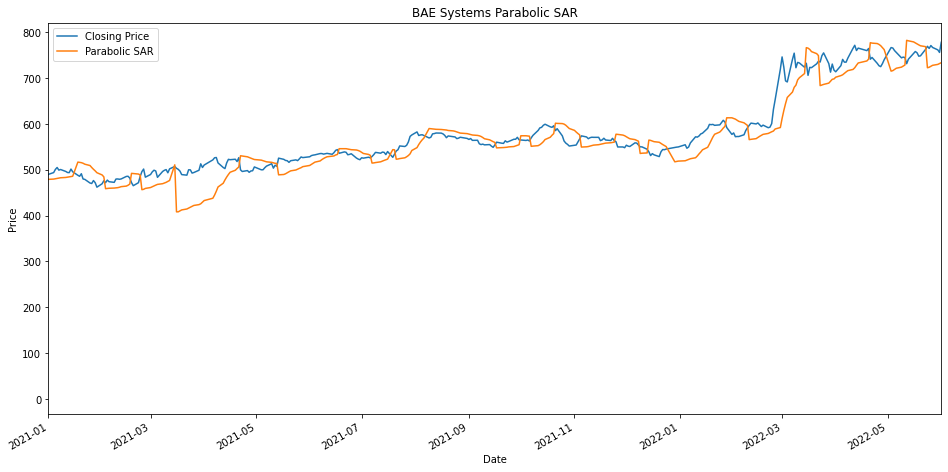

In [4]:
#Plot SAR and closing price
pdr_bae_data['Close'].plot(label='Closing Price',figsize=(16,8))
pdr_bae_data['SAR'].plot(label='Parabolic SAR')

_=plt.xlabel('Date')
_=plt.ylabel('Price')
_=plt.title('BAE Systems Parabolic SAR')
plt.xlim(datetime(2021,1,1),end) #start x-axis at the start of 2021 so the different series are discernible
plt.legend();